Importing Packages


In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('https://github.com/zeerau/data-science-practice/raw/refs/heads/main/amdari/Dataset.xlsx')

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [5]:
df.duplicated().any()

np.False_

In [6]:
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


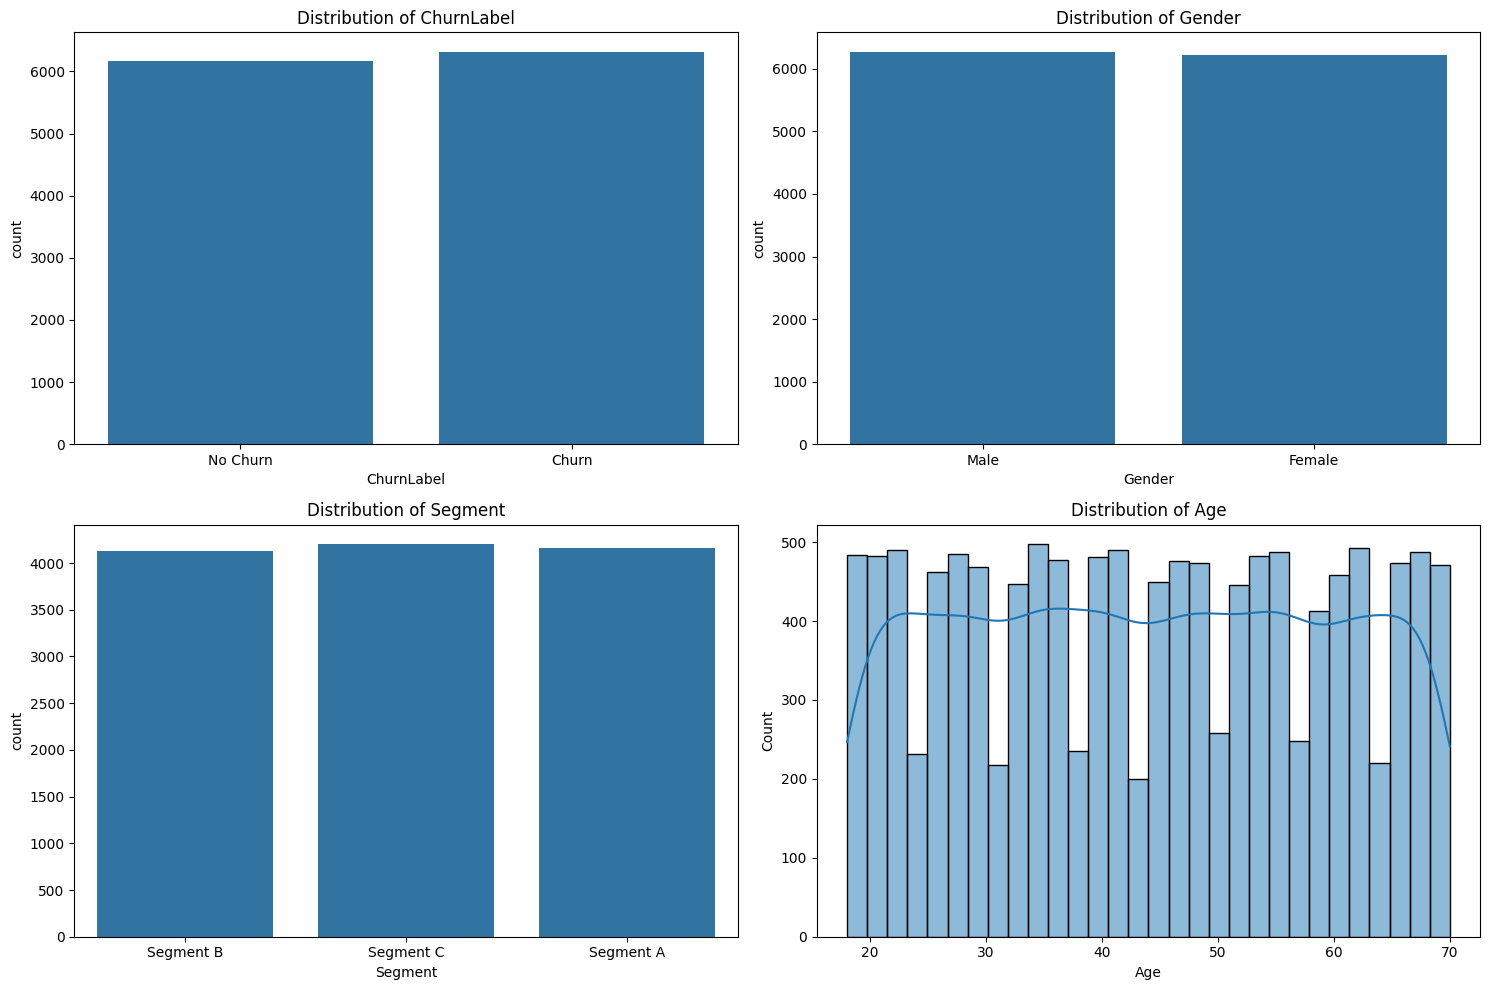

In [8]:
# set up fig and ax
fig,ax = plt.subplots(nrows= 2,ncols = 2,figsize = (15,10))

#plot distribution of churnlabel
sns.countplot(data = df,x = 'ChurnLabel',ax = ax[0,0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn','Churn'])


#plot distribution of gender
sns.countplot(data = df,x = 'Gender',ax = ax[0,1])
ax[0,1].set_title('Distribution of Gender')
ax[0,1].set_xticklabels(['Male','Female'])

#plot distribution of segments
sns.countplot(data = df,x = 'Segment',ax = ax[1,0])
ax[1,0].set_title('Distribution of Segment')

#age distribution
sns.histplot(data = df,x = 'Age',bins=30,ax = ax[1,1],kde=True)
ax[1,1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()



Correlation Analysis

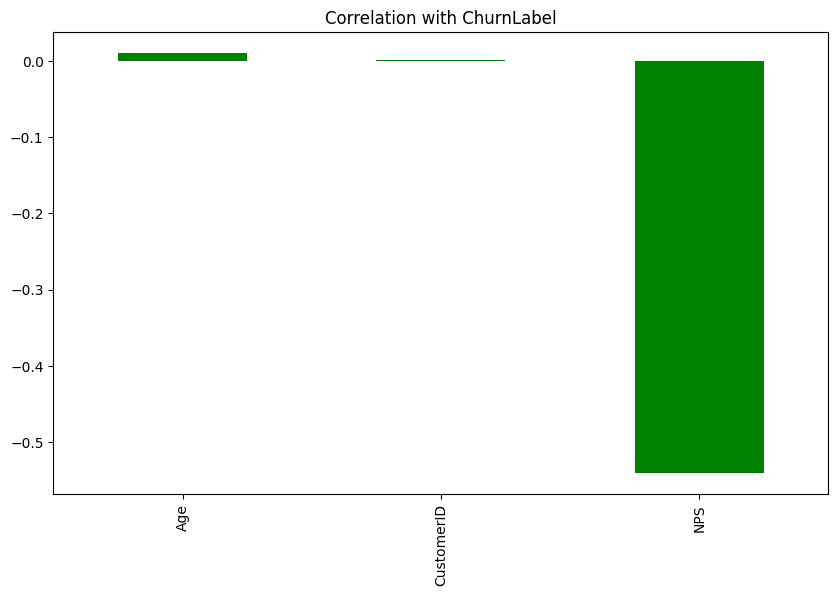

,ChurnLabel
ChurnLabel,1.000000
Age,0.010273
CustomerID,0.001530
NPS,-0.540703


In [12]:
#calculating correlation with churnlabel column
corr = df.select_dtypes(include = np.number).corr()['ChurnLabel'].sort_values(ascending = False)

#plot the correlation
plt.figure(figsize = (10,6))
corr.drop('ChurnLabel').plot(kind='bar',color='green')
plt.title('Correlation with ChurnLabel')
plt.show()
corr

In [14]:
#list out the nested columns
nested_columns =[
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#print out values of first row to each column
for column in nested_columns:
    print(f'{column}:')
    print(df[column].iloc[0])
    print()

PurchaseHistory:
[{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]

SubscriptionDetails:
{'Plan': 'Express', 'Start_Date': '2020-06-08', 'End_Date': '2022-10-27'}

ServiceInteractions:
[{'Type': 'Call', 'Date': '2019-09-26'}, {'Type': 'Chat', 'Date': '2021-07-25'}, {'Type': 'Email', 'Date': '2020-04-13'}, {'Type': 'Chat', 'Date': '2020-11-15'}]

PaymentHistory:
[{'Method': 'Credit Card', 'Late_Payments': 5}, {'Method': 'PayPal', 'Late_Payments': 11}, {'Method': 'Bank Transfer', 'Late_Payments': 24}]

WebsiteUsage:
{'PageViews': 49, 'TimeSpent(minutes)': 15}

ClickstreamData:
[{

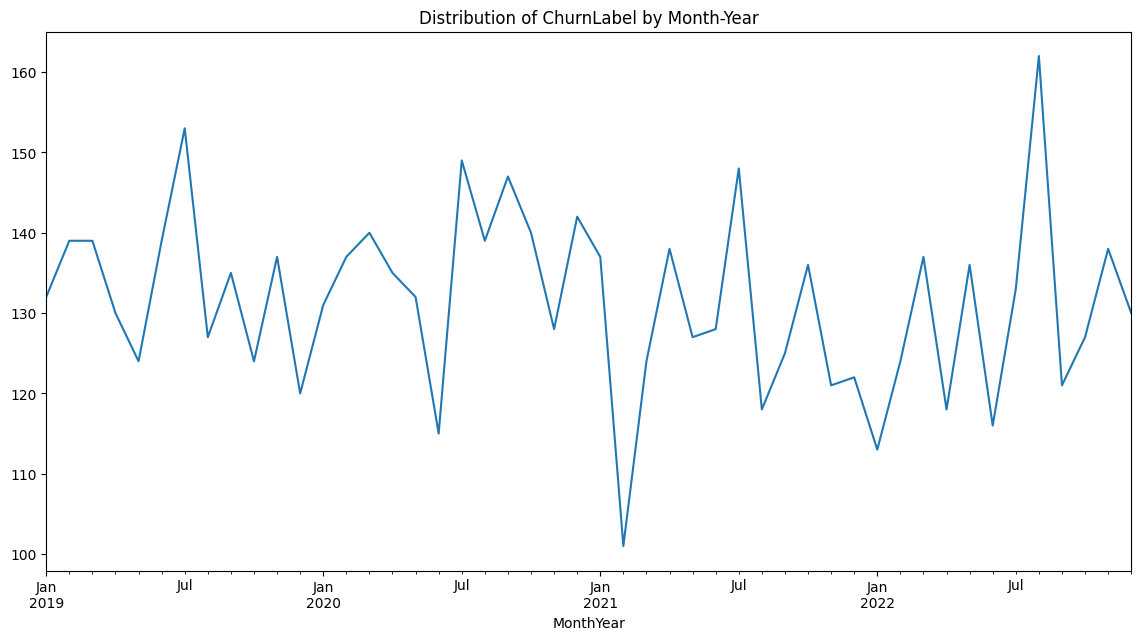

In [19]:
#Convert timestamp to datetime format

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#extract month-year from timetamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

#group monthyear and calculate churn rates
churn_rates = df.groupby('MonthYear')['ChurnLabel'].sum()

#plot the distribution of churnlabel by month-year
plt.figure(figsize = (14,7))
churn_rates.plot()
plt.title('Distribution of ChurnLabel by Month-Year')
plt.show()